In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns

In [269]:
GPT_Scores_df = pd.read_csv('Scores_50_ff.csv')
Scores = pd.read_csv('/Users/mason_yu/Study/ATFC-MSc/Project/Datasets/ESG-Score/Union_Scores_of_companies_in_FTSE-allshares&RUSSELL-3000_from_MSCI_SP_Sustainalytics.csv').dropna(subset=['SP_Score','MSCI_Score','SUS_Score'])

In [270]:
GPT_Scores_df

,Name,Score_detail,Score,Score_detail_10,Score_10,Score_detail_20,Score_20,Score_directly,Score_directly_10,Score_directly_20,...,Score_detail_Summary20_MSCI_b=10,Score_Summary20_MSCI_b=10,Score_detail_Summary20_SP_b=10,Score_Summary20_SP_b=10,Score_detail_Summary20_SP_G_b=10,Score_Summary20_SP_G_b=10,Score_detail_Summary20_SUS_b=10,Score_Summary20_SUS_b=10,Score_detail_Summary20_20_b=10,Score_Summary20_20_b=10
0,Shell plc,"Based on the evaluation summary provided, here...",73,Based on the Governance Indicators Assessment ...,51,"Based on the governance indicators report, the...",65,91.375,91.627,95.450,...,To evaluate the governance performance based o...,66,Based on the governance performance evaluation...,20,Based on the governance performance evaluation...,0,Based on the governance performance assessment...,30,Based on the provided governance performance s...,65
1,NatWest Group plc,"Based on the evaluation summary provided, here...",96,Based on the Governance Indicators Report Summ...,64,"Based on the governance indicators report, the...",70,100.000,92.012,95.200,...,To evaluate the governance performance based o...,52,Based on the governance performance evaluation...,20,Based on the governance performance evaluation...,0,Based on the governance performance assessment...,20,Based on the provided governance performance s...,50
2,Reckitt Benckiser Group Plc,"Based on the evaluation summary provided, here...",83,Based on the Governance Indicators Report Summ...,64,"Based on the governance indicators report, the...",45,99.700,100.627,84.478,...,To evaluate the governance performance based o...,54,Based on the governance performance evaluation...,10,Based on the governance performance evaluation...,0,Based on the governance performance assessment...,20,Based on the provided governance performance s...,40
3,International Consolidated Airlines Group SA,"Based on the evaluation summary provided, here...",85,Based on the Governance Indicators Report Summ...,56,"Based on the governance indicators report, the...",30,101.369,90.479,99.719,...,To evaluate the governance performance based o...,53,Based on the governance performance evaluation...,5,Based on the governance performance evaluation...,0,Based on the governance performance assessment...,20,Based on the provided governance performance s...,40
4,Standard Chartered plc,"Based on the evaluation summary provided, here...",90,Based on the Governance Indicators Report Summ...,55,"Based on the governance indicators report, the...",35,99.400,73.802,88.048,...,To evaluate the governance performance based o...,54,Based on the governance performance evaluation...,20,Based on the governance performance evaluation...,0,Based on the governance performance assessment...,30,Based on the provided governance performance s...,50
5,Antofagasta plc,"Based on the evaluation summary provided, here...",87,"Based on the Governance Indicators Report, the...",58,Based on the governance indicators report summ...,30,96.900,92.521,83.338,...,To evaluate the governance performance based o...,45,Based on the governance performance evaluation...,5,Based on the governance performance evaluation...,0,Based on the governance performance assessment...,20,Based on the provided governance performance s...,35
6,Taylor Wimpey plc,"Based on the evaluation summary provided, here...",92,Based on the Governance Indicators Report Summ...,55,"Based on the governance structure overview, th...",15,99.100,87.202,93.800,...,To evaluate the governance performance based o...,43,Based on the governance performance evaluation...,10,Based on the governance performance evaluation...,0,Based on the governance performance assessment...,15,Based on the provided governance performance s...,15
7,Anglo American,"Based on the evaluation summary provided, here...",92,Based on the Governance Indicators Report Summ...,56,Based on the Governance Indicators Report summ...,25,97.700,95.509,90.907,...,**Governance Indicators Report Summary**\n\nT

In [271]:
Scores_20 = pd.read_csv('Scores_20_more.csv')#.drop(['Score_A','Score_A_10','Score_A_20'],axis=1)
GPT_Scores_df = Scores_20.merge(GPT_Scores_df[['Name','Score_10_b=10',
       'Score_20_b=10',
       'Score_Summary10_MSCI_b=10',
       'Score_Summary10_SP_b=10',
       'Score_Summary10_SP_G_b=10',
       'Score_Summary10_SUS_b=10',
       'Score_Summary10_10_b=10',
       'Score_Summary20_MSCI_b=10',
       'Score_Summary20_SP_b=10',
       'Score_Summary20_SP_G_b=10',
       'Score_Summary20_SUS_b=10',
       'Score_Summary20_20_b=10']],how='left',on='Name')

In [272]:
# Scores_20_A = pd.read_csv('Scores_20_A.csv')
# GPT_Scores_df = GPT_Scores_df.merge(Scores_20_A[['Name','Score_A','Score_A_10','Score_A_20']],how='left',on='Name')

In [273]:
GPT_Scores_df

,Name,Score_detail_A,Score_A,Score_detail_A_10,Score_A_10,Score_detail_A_20,Score_A_20,Score_detail,Score,Score_detail_10,...,Score_Summary10_MSCI_b=10,Score_Summary10_SP_b=10,Score_Summary10_SP_G_b=10,Score_Summary10_SUS_b=10,Score_Summary10_10_b=10,Score_Summary20_MSCI_b=10,Score_Summary20_SP_b=10,Score_Summary20_SP_G_b=10,Score_Summary20_SUS_b=10,Score_Summary20_20_b=10
0,Shell plc,Based on the evaluations provided across vario...,75,Based on the provided key metrics and the info...,0,Based on the evaluations provided for each key...,40,"Based on the evaluation summary provided, here...",70,Based on the Governance Indicators Assessment ...,...,60.0,50.0,0.0,10.0,35.0,66.0,20.0,0.0,30.0,65.0
1,NatWest Group plc,Based on the evaluations provided across vario...,85,Based on the evaluations of the key metrics pr...,20,Based on the evaluations provided for each key...,40,"Based on the evaluation summary provided, here...",95,Based on the Governance Indicators Report Summ...,...,75.0,20.0,0.0,55.0,30.0,52.0,20.0,0.0,20.0,50.0
2,Reckitt Benckiser Group Plc,Based on the evaluations provided across vario...,77,Based on the evaluations of the key metrics pr...,4,Based on the evaluations provided for each key...,60,"Based on the evaluation summary provided, here...",84,Based on the Governance Indicators Report Summ...,...,70.0,50.0,0.0,80.0,45.0,54.0,10.0,0.0,20.0,40.0
3,DCC plc,Based on the evaluations provided across vario...,0,Based on the evaluations of the key metrics pr...,4,Based on the evaluations provided for each key...,10,"Based on the evaluation summary provided, here...",39,Based on the Governance Indicators Report Summ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,International Consolidated Airlines Group SA,Based on the evaluations provided across vario...,4,Based on the evaluations of the key metrics pr...,4,Based on the evaluations provided for each key...,20,"Based on the evaluation summary provided, here...",83,Based on the Governance Indicators Report Summ...,...,70.0,30.0,0.0,55.0,35.0,53.0,5.0,0.0,20.0,40.0
5,Standard Chartered plc,Based on the evaluations provided across vario...,65,Based on the evaluations of the key metrics pr...,4,Based on the evaluations provided for each key...,20,"Based on the evaluation summary provided, here...",90,Based on the Governance Indicators Report Summ...,...,65.0,35.0,0.0,60.0,35.0,54.0,20.0,0.0,30.0,50.0
6,Antofagasta plc,Based on the evaluations provided across vario...,49,Based on the evaluations of the key metrics pr...,4,Based on the evaluations provided for each key...,20,"Based on the evaluation summary provided, here...",87,"Based on the Governance Indicators Report, the...",...,55.0,55.0,0.0,40.0,30.0,45.0,5.0,0.0,20.0,35.0
7,Taylor Wimpey plc,Based on the evaluations provided across vario...,49,Based on the evaluations of the key metrics pr...,4,Based on the evaluations provided for each key...,20,"Based on the evaluation summary provided, here...",90,Based on the Governance Indicators Report Summ...,...,60.0,50.0,0.0,60.0,45.0,43.0,10.0,0.0,15.0,15.0
8,Anglo American,Based on the evaluations provided across vario...,49,Based on the evaluations of the key metrics pr...,4,Based on the evaluations provided for each key...,40,"Based on the evaluation summary provided, here...",92,Based on the Governance Indicators Report Summ...,...,65.0,60.0,0.0,75.0,50.0,0.0,0.0,0.0,20.0,5.0
9,Halma plc,Based on the evaluations provided across vario...,49,Based on the evaluations of the key metrics pr...,4,Based on the evaluations provided for each key...,20,"Based on the evaluation summary provided, here...",91,Based on the Governance Indicators Report Summ...,...,60.0,35.0,0.0,55.0,55.0,56.0,25.0,0.0,25.0,20.0


In [274]:
GPT_Scores_df
GPT_Scores_df = GPT_Scores_df[~GPT_Scores_df['Name'].isin(['Vodafone Group PLC (UK)','Kingfisher'])]

In [275]:
# 将所有元素转化为小写并删除最后一个单词的函数
def process_strings(strings):
    processed = []
    keywords = {'plc', 'ltd', 'limited'}
    
    for s in strings:
        # 使用正则表达式删除括号及其中的内容
        s = re.sub(r'\(.*?\)', '', s)
        words = s.lower().split()
        
        # 检查最后一个单词是否在指定的关键词列表中
        if len(words) > 1 and words[-1] in keywords:
            processed.append(" ".join(words[:-1]))
        else:
            processed.append(s.lower())
    
    return processed

# 处理 DataFrame 和列表中的字符串
Scores_names = process_strings(Scores['Name'].tolist())
GPT_names = process_strings(GPT_Scores_df['Name'].tolist())

# 找出相同的项并记录原始列表中的索引
index_Scores_matches = [i for i, item in enumerate(GPT_names) if item in Scores_names]
index_GPT_matches = [i for i, item in enumerate(Scores_names) if item in GPT_names]

# 根据索引找到原始 list 中的项
# original_matches_GPT = [GPT_Scores_df['Name'].tolist()[i] for i in index_Scores_matches]
# original_matches_Scores = [GPT_names.tolist()[i] for i in index_GPT_matches]


In [276]:
Four_Scores_df = Scores[['Name','Score_Gov','SP_Score','MSCI_Score','SUS_Score']].iloc[index_GPT_matches]
Four_Scores_df['name'] = Four_Scores_df['Name'].apply(lambda x: process_strings([x])[0])
GPT_Scores_df['name'] = GPT_Scores_df['Name'].apply(lambda x: process_strings([x])[0])
compare_df = GPT_Scores_df.merge(Four_Scores_df,how='left',on='name').drop(['name','Name_y'],axis=1).set_index("Name_x")

In [277]:
# Score_Gov = [56,37,49,57,47,62,None,57]
# SP_Score = [59,47,55,57,51,56,None,57]
# MSCI_Score = ['aa','b','a',None,'aa','aa','aa','a']
# SUS_Score = [22,26.8,22.9,10.1,17.7,24.2,17.8,14.4]
# compare_df = GPT_Scores_df.copy(deep=True)
# compare_df['Score_Gov'] = Score_Gov
# compare_df['SP_Score'] = SP_Score
# compare_df['MSCI_Score'] = MSCI_Score
# compare_df['SUS_Score'] = SUS_Score

In [278]:
map = {'aaa':6,'aa':5,'a':4,'bbb':3,'bb':2,'b':1,'ccc':0}
compare_df['MSCI_Score'] = compare_df['MSCI_Score'].map(map)
# Standardizing the scores to 0-1 range
df_standardized = compare_df.copy()
# Function to standardize a column
def standardize_column(column):
    return (column - column.min()) / (column.max() - column.min())

# Standardizing only the numeric columns
numeric_columns = df_standardized.select_dtypes(include=['float64', 'int64']).columns
df_standardized[numeric_columns] = df_standardized[numeric_columns].apply(standardize_column)

In [279]:
# correlation_matrix = compare_df[['Score_directly','Score','Score_directly_10','Score_10','Score_directly_20','Score_20','Score_Gov','SP_Score','MSCI_Score','SUS_Score']].corr()
correlation_matrix = compare_df[['Score_directly','Score','Score_directly_10','Score_10','Score_directly_20','Score_20','Score_Summary10_MSCI', 
                                 'Score_A','Score_A_10','Score_A_20',
       'Score_Summary10_SP', 
       'Score_Summary10_SP_G', 
       'Score_Summary10_SUS',
       'Score_Summary10_10', 
       'Score_Summary20_MSCI', 
       'Score_Summary20_SP', 
       'Score_Summary20_SP_G', 
       'Score_Summary20_SUS', 
       'Score_Summary20_20',
       'Score_10_b=10',
       'Score_20_b=10',
       'Score_Summary10_MSCI_b=10',
       'Score_Summary10_SP_b=10',
       'Score_Summary10_SP_G_b=10',
       'Score_Summary10_SUS_b=10',
       'Score_Summary10_10_b=10',
       'Score_Summary20_MSCI_b=10',
       'Score_Summary20_SP_b=10',
       'Score_Summary20_SP_G_b=10',
       'Score_Summary20_SUS_b=10',
       'Score_Summary20_20_b=10',
       'Score_Gov','SP_Score','MSCI_Score','SUS_Score']].corr()

# # Plotting the correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Heatmap of Standardized Scores')
# plt.show()


In [280]:
compare_df['Score_Summary10_SP_G_b=10']

Name_x
Shell plc                                       0.0
NatWest Group plc                               0.0
Reckitt Benckiser Group Plc                     0.0
DCC plc                                         NaN
International Consolidated Airlines Group SA    0.0
Standard Chartered plc                          0.0
Antofagasta plc                                 0.0
Taylor Wimpey plc                               0.0
Anglo American                                  0.0
Halma plc                                       0.0
AstraZeneca plc                                 0.0
Haleon plc                                      0.0
Land Securities Group plc                       0.0
GSK plc                                         0.0
London Stock Exchange Group plc                 0.0
Phoenix Group Holdings Plc                      0.0
Bunzl plc                                       0.0
HSBC Holdings plc                               0.0
Hikma Pharmaceuticals                           0.0
RELX 

In [281]:
correlation_matrix.index

Index(['Score_directly', 'Score', 'Score_directly_10', 'Score_10',
       'Score_directly_20', 'Score_20', 'Score_Summary10_MSCI', 'Score_A',
       'Score_A_10', 'Score_A_20', 'Score_Summary10_SP',
       'Score_Summary10_SP_G', 'Score_Summary10_SUS', 'Score_Summary10_10',
       'Score_Summary20_MSCI', 'Score_Summary20_SP', 'Score_Summary20_SP_G',
       'Score_Summary20_SUS', 'Score_Summary20_20', 'Score_10_b=10',
       'Score_20_b=10', 'Score_Summary10_MSCI_b=10', 'Score_Summary10_SP_b=10',
       'Score_Summary10_SP_G_b=10', 'Score_Summary10_SUS_b=10',
       'Score_Summary10_10_b=10', 'Score_Summary20_MSCI_b=10',
       'Score_Summary20_SP_b=10', 'Score_Summary20_SP_G_b=10',
       'Score_Summary20_SUS_b=10', 'Score_Summary20_20_b=10', 'Score_Gov',
       'SP_Score', 'MSCI_Score', 'SUS_Score'],
      dtype='object')

In [283]:
rows_to_keep

['Score_Summary10_MSCI',
 'Score_Summary10_SP',
 'Score_Summary10_SP_G',
 'Score_Summary10_SUS',
 'Score_Summary10_10']

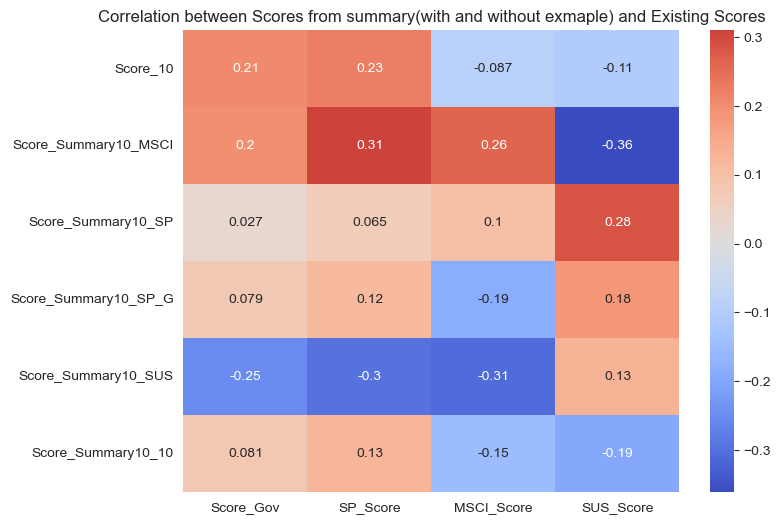

In [285]:
# Selecting the relevant rows and columns
rows_to_keep = correlation_matrix.index[:-4]
# rows_to_keep = [index for index in correlation_matrix.index if '_10' in index or '_Summary10' in index][0:7]
# rows_to_keep = ['Score_directly_10','Score_A_10','Score_10']
rows_to_keep = ['Score_10','Score_Summary10_MSCI','Score_Summary10_SP','Score_Summary10_SP_G','Score_Summary10_SUS','Score_Summary10_10']
cols_to_keep = ['Score_Gov','SP_Score','MSCI_Score','SUS_Score']
# cols_to_keep = ['Score_directly_10','Score_A_10','Score_10']

# Creating the asymmetric correlation matrix
asymmetric_corr_matrix = correlation_matrix.loc[rows_to_keep, cols_to_keep]

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(asymmetric_corr_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Asymmetric Correlation Heatmap of Standardized Scores')
plt.title('Correlation between Scores from summary(with and without exmaple) and Existing Scores')
plt.show()

In [286]:
asymmetric_corr_matrix

,Score_Gov,SP_Score,MSCI_Score,SUS_Score
Score_10,0.205988,0.225600,-0.086570,-0.106422
Score_Summary10_MSCI,0.198809,0.310110,0.264210,-0.361568
Score_Summary10_SP,0.026818,0.065399,0.100849,0.284191
Score_Summary10_SP_G,0.079092,0.115018,-0.185414,0.184690
Score_Summary10_SUS,-0.253312,-0.297532,-0.309027,0.131694
Score_Summary10_10,0.080864,0.125587,-0.151509,-0.194244


In [265]:
output_df = pd.read_csv('Assessment_Summary_8.csv')

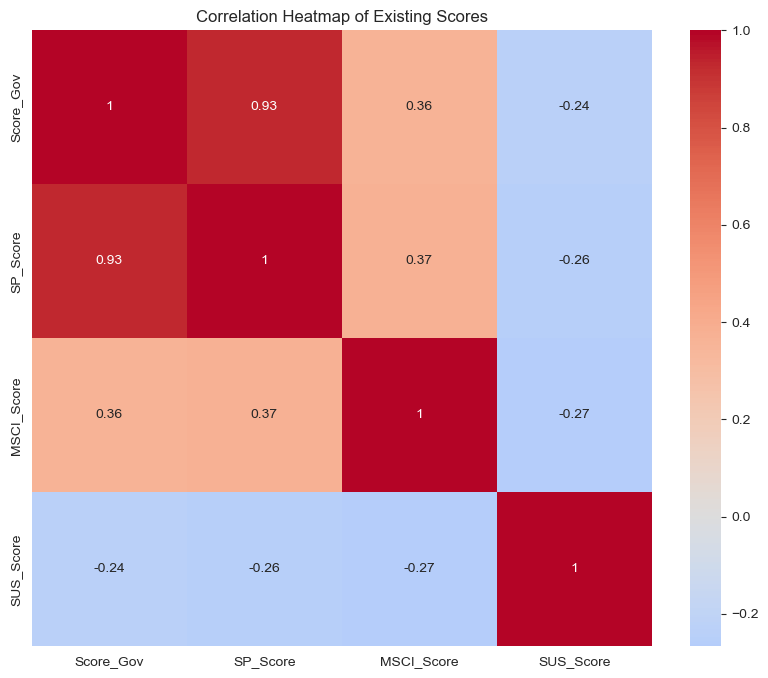

In [266]:
cm_df = pd.read_csv('/Users/mason_yu/Study/ATFC-MSc/Project/Datasets/ESG-Score/Union_Scores_of_companies_in_FTSE-allshares&RUSSELL-3000_from_MSCI_SP_Sustainalytics.csv')[['Score_Gov','SP_Score','MSCI_Score','SUS_Score']]
cm_df['MSCI_Score'] = cm_df['MSCI_Score'].map(map)
correlation_matrix = cm_df.corr()
# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Existing Scores')
plt.show()

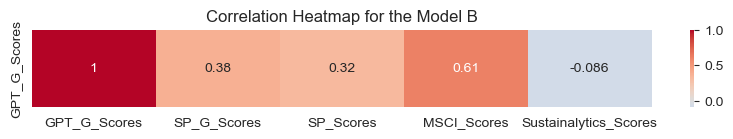

In [267]:

GPT_Scores_df = pd.read_csv('Scores_8.csv')[['Name','Score_10']]
Scores = pd.read_csv(
    '/Users/mason_yu/Study/ATFC-MSc/Project/Datasets/ESG-Score/Union_Scores_of_companies_in_FTSE-allshares&RUSSELL-3000_from_MSCI_SP_Sustainalytics.csv').dropna(
    subset=['SP_Score', 'MSCI_Score', 'SUS_Score'])

SP_G_Scores = [56,37,49,57,47,62,None,57]
SP_Scores = [59,47,55,57,51,56,None,57]
MSCI_Scores = ['AA','B','A',None,'AA','AA','AA','A']
Sustainalytics_Scores = [22,26.8,22.9,10.1,17.7,24.2,17.8,14.4]

df_compare = pd.DataFrame({"Name":GPT_Scores_df['Name'].tolist(),
                           "GPT_G_Scores":GPT_Scores_df['Score_10'].tolist(),
                           "SP_G_Scores": SP_G_Scores,
                           "SP_Scores": SP_Scores,
                           "MSCI_Scores": MSCI_Scores,
                           "Sustainalytics_Scores": Sustainalytics_Scores
                           })
df_compare = df_compare.set_index("Name")

map = {'AAA':6,'AA':5,'A':4,'BBB':3,'BB':2,'B':1,'CCC':0}
df_compare['MSCI_Scores'] = df_compare['MSCI_Scores'].map(map)

# Calculate the correlation matrix
correlation_matrix = df_compare.corr()

# Select only the first row and the last 4 columns using iloc
first_row = correlation_matrix.iloc[0:1, :]  # Selecting the first row and last 4 columns by position

# Plotting the correlation heatmap
plt.figure(figsize=(10, 1))  # Adjusting the figure size to fit a single row
sns.heatmap(first_row, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for the Model B')
plt.show()